# Bike Rental Assignment

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### The company is interested to know:



Which variables are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands.

### Business goal:

To understand how exactly the demands vary with different features.

They want a model and accordingly modify the business strategy to meet the demand levels and meet the customer's expectations.

## 1. Importing the required Libraries

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

## 2. Reading and understanding the data

In [4]:
# Reading the day.csv file using 'read_csv'. 

df=pd.read_csv('day.csv')
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Checking no. of rows & columns in the dataframe

df.shape

(730, 16)

### Inference
    Dataset has 730 rows and 16 columns.
    Except one column, all other are either float or integer type. One column is object date type.
    Looking at the data, there seems to be some fields that are categorical in nature, but are in integer/float type.
    We will have to analyse and decide whether to convert them to categorical or treat them as integer.

In [6]:
#Checking the column-wise info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [7]:
#describing the numerical data

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 3. Data Cleaning

### 3.1 Dropping the columns which are not useful for our analysis

    From the dataset, we can see that cnt column is sum of casual & registered column. So dropping the the two column.
    Instant column is used only for indexing, so dropping it.
    Removing column dteday as all the informations are available related to year, month in yr and mnth column.
    Creating a new dataset df_bike

In [8]:
df_bike = df.drop(['casual' , 'registered', 'instant', 'dteday'], axis=1)
df_bike.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 3.2 Converting the categorical columns to data type category

In [9]:
#Coverting the columns season, yr, mnth, holiday, weekday, workingday and weathersit to categorical and mapping the variables

df_bike['season'] = df_bike.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}).astype('category')
df_bike['yr'] = df_bike.yr.replace({0: 2018, 1:2019}).astype('category')
df_bike['mnth'] = df_bike.mnth.replace({1:'Jan',2:'Feb',3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}).astype('category')
df_bike['holiday'] = df_bike.holiday.replace({0:'No', 1:'Yes'}).astype('category')
df_bike['weekday'] = df_bike.weekday.replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}).astype('category')
df_bike['workingday'] = df_bike.workingday.replace({0:'No', 1:'Yes'}).astype('category')
df_bike['weathersit'] = df_bike.weathersit.replace({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Snow + Fog'}).astype('category')


df_bike.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No,Mon,Yes,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Tue,Yes,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Wed,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Thu,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Fri,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
#checking shape of new dataframe
df_bike.shape

(730, 12)

In [11]:
#Checking the column-wise info of the dataframe

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null category
yr            730 non-null category
mnth          730 non-null category
holiday       730 non-null category
weekday       730 non-null category
workingday    730 non-null category
weathersit    730 non-null category
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: category(7), float64(4), int64(1)
memory usage: 34.4 KB


In [12]:
#describing the numerical data

df_bike.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


## Handling Outlier

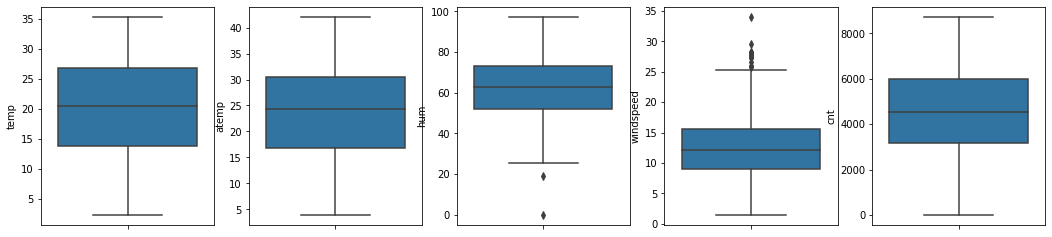

In [13]:
# Draw box plots for indepent variables with continuous values

cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,5,i)
    sns.boxplot(y=col, data=df_bike)
    i+=1

### Inference :
    From the above boxplot we can see there aren't any outliers as such, we can now proceed with our analysis

# 4. Exploratory Data Analysis 

### 4.1 EDA graph plot on numerical features

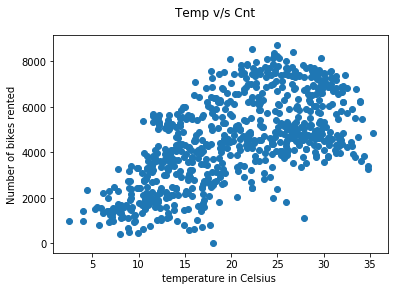

In [14]:
# Plotting scatter plot to check the Total number of bikes rented as per the temperature.

plt.scatter(df_bike['temp'], df_bike['cnt'])
plt.suptitle('Temp v/s Cnt')
plt.xlabel('temperature in Celsius ')
plt.ylabel('Number of bikes rented')
plt.show()

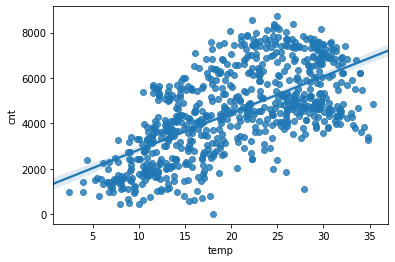

In [15]:
# Regression plot for temp and cnt

temp_cnt=sns.regplot(x='temp' , y='cnt' , data=df_bike)

### Interference:

    By seeing the graph, we can say:
    As the temperature rises the total count of the bikes got rented also increased.
    After 30 degree celsuis temperature, there is reduction in renting bikes. 

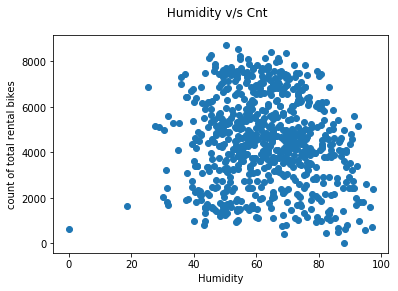

In [18]:
# Plotting scatter plot to check the Total number of bikes rented as per the humidity.

plt.scatter(df_bike['hum'], df_bike['cnt'])
plt.suptitle(' Humidity v/s Cnt')
plt.xlabel('Humidity')
plt.ylabel('count of total rental bikes')
plt.show()

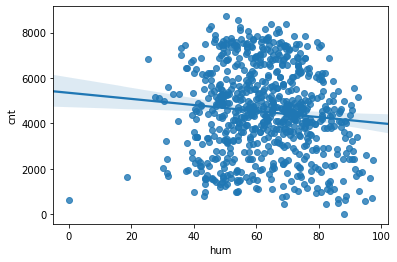

In [19]:
# Regression plot for humidity and cnt

temp_cnt=sns.regplot(x='hum' , y='cnt' , data=df_bike)

### Interference:

    From the scatter plot we can say that there is rise in bike renting when Humidity is above 35.
    Slowly the bike renting falls down when the humidity increases more than 80.

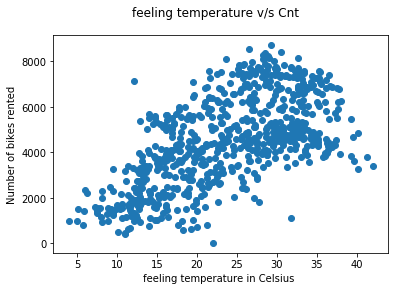

In [20]:
# Plotting scatter plot to check the Total number of bikes rented as per the feeling temperature.

plt.scatter(df_bike['atemp'], df_bike['cnt'])
plt.suptitle('feeling temperature v/s Cnt')
plt.xlabel('feeling temperature in Celsius ')
plt.ylabel('Number of bikes rented')
plt.show()

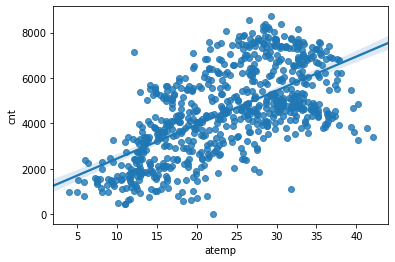

In [21]:
# Regression plot for atemp and cnt

temp_cnt=sns.regplot(x='atemp' , y='cnt' , data=df_bike)

### Inference:

    By seeing the graph, we can say:
    As per the rise in feeling temperature the total count of the bikes got rented also increased.
    After 30 degree celsuis temperature, there is reduction in renting the bikes. 

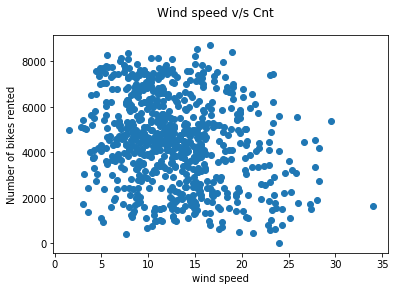

In [22]:
# Plotting scatter plot to check the Total number of bikes rented as per the Windspeed.

plt.scatter(df_bike['windspeed'], df_bike['cnt'])
plt.suptitle('Wind speed v/s Cnt')
plt.xlabel('wind speed')
plt.ylabel('Number of bikes rented')
plt.show()

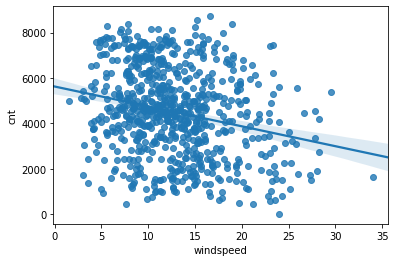

In [23]:
# Regression plot for Windspeed and cnt
temp_cnt=sns.regplot(x='windspeed' , y='cnt' , data=df_bike)

### Inference:

    It is very clear from the graph that the wind speed and bike rental are inversely proportional.

### 4.2 EDA graph plot on categorical features

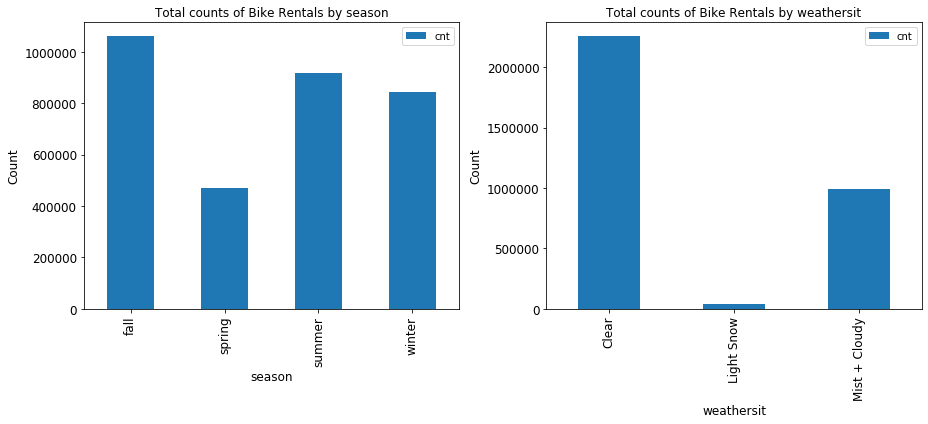

In [24]:
#Subplotting the bar graphs for the total count of bike rentals by season & weathersit

f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = df_bike[['season','cnt']].groupby(['season']).sum().plot(kind='bar', title ="Total counts of Bike Rentals by season", fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

 
ax2 = df_bike[['weathersit','cnt']].groupby(['weathersit']).sum().plot(kind='bar', stacked=True, title ="Total counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

f.tight_layout()

### Inference:

    The above graph shows:
 
    1) In the fall season, the bikes are rented the most
    
    2) People tends to rent more bike in clear weather



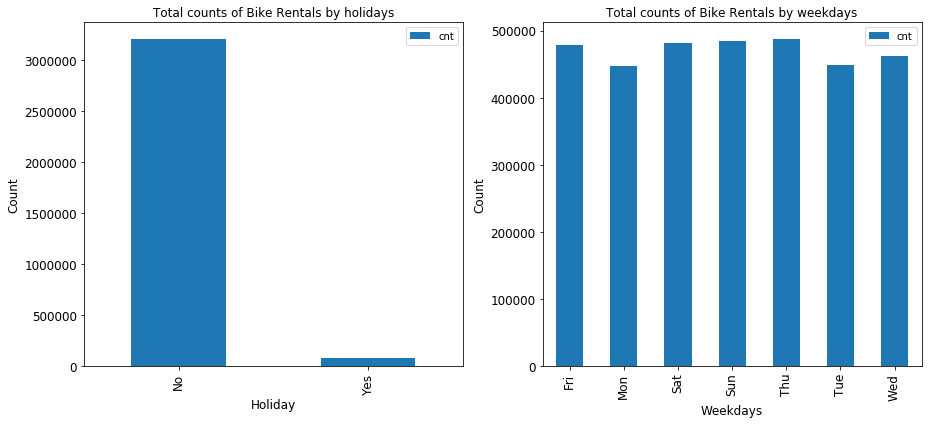

In [25]:
#Subplotting the bar graphs for the total count og bike rentals by Holiday & weekdays


f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = df_bike[['holiday','cnt']].groupby(['holiday']).sum().plot(kind='bar', stacked=True,title ="Total counts of Bike Rentals by holidays", fontsize=12, ax=ax1)
ax1.set_xlabel("Holiday", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

 
ax2 = df_bike[['weekday','cnt']].groupby(['weekday']).sum().plot(kind='bar', stacked=True, title ="Total counts of Bike Rentals by weekdays", fontsize=12, ax=ax2)

ax2.set_xlabel("Weekdays", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

f.tight_layout()

### Inference:

    The above graph shows:
    
    1) Mostly people will rent bikes when there is no holidays
 
    2) Almost everyday the count of bike renting is above 400000


### 4.3 Drawing correlation using Heatmap

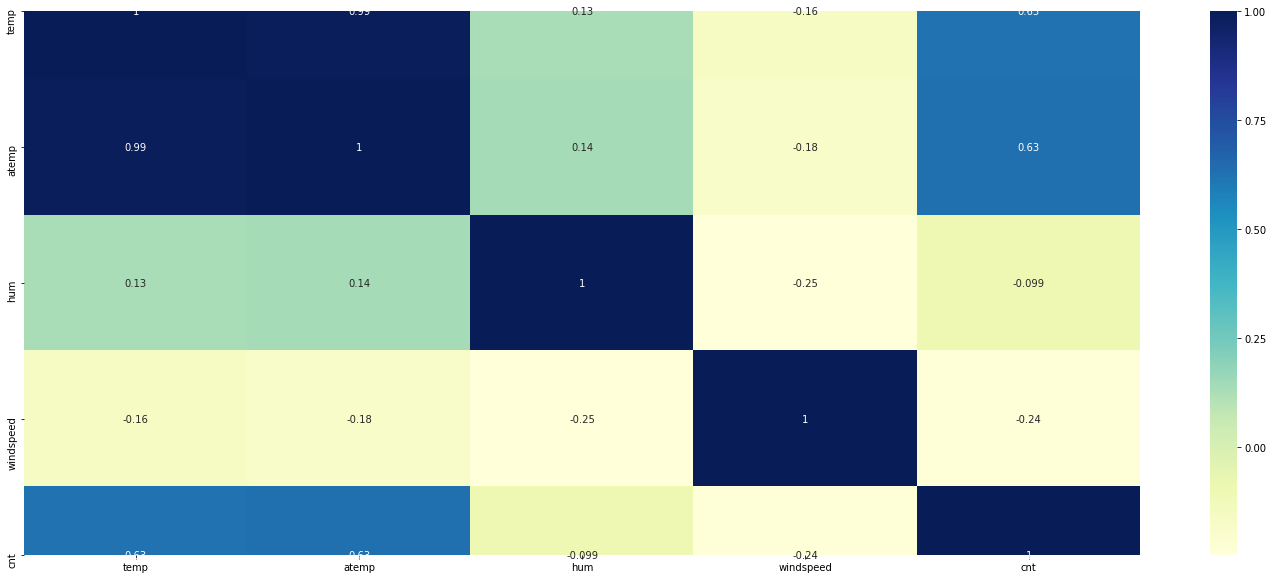

In [26]:
#Calculating the Correlation for numerical/regression values
corr = df_bike.corr()
plt.figure(figsize=(25,10))

#Drawing Heatmap of correlation for numerical values
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

### Inferences:

    From the heat map, we can say that atemp and temp is highly correlated.

    Temp and Atemp also have high correlation with cnt variable.


## 5. Preparing data for Linear Regression

### 5.1 Creating dummy variables for all categorical variables

In [27]:
#Creating dummies for the categorical data:

df_bike = pd.get_dummies(df_bike, drop_first=True)
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
temp                        730 non-null float64
atemp                       730 non-null float64
hum                         730 non-null float64
windspeed                   730 non-null float64
cnt                         730 non-null int64
season_spring               730 non-null uint8
season_summer               730 non-null uint8
season_winter               730 non-null uint8
yr_2019                     730 non-null uint8
mnth_Aug                    730 non-null uint8
mnth_Dec                    730 non-null uint8
mnth_Feb                    730 non-null uint8
mnth_Jan                    730 non-null uint8
mnth_Jul                    730 non-null uint8
mnth_Jun                    730 non-null uint8
mnth_Mar                    730 non-null uint8
mnth_May                    730 non-null uint8
mnth_Nov                    730 non-null uint8
mnth_Oct                    730 non-null 

In [28]:
# Shape of the dataframe post creating dummies:

df_bike.shape

(730, 30)

In [29]:
#fetching the dataset using head()

df_bike.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light Snow,weathersit_Mist + Cloudy
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 6. Building Model

### 6.1 Splitting the data into 70-30 Training and test

In [30]:
#y to contain only target variable
y=df_bike.pop('cnt')

#X is all remainign variable also our independent variables
X=df_bike

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [31]:
#fetching the data to validate

X.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light Snow,weathersit_Mist + Cloudy
0,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
#Printing shape of both train and test

print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


### 6.2 Feature Scaling the continuous variables using normalized scaler

In [33]:
from sklearn.preprocessing import MinMaxScaler

num_vars = ['temp','atemp','hum','windspeed']

#Using Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [34]:
#describing the data

X_train.describe()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light Snow,weathersit_Mist + Cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.552390,0.544999,0.644967,0.317738,0.244618,0.254403,0.252446,0.483366,0.088063,0.093933,...,0.023483,0.136986,0.148728,0.133072,0.144814,0.148728,0.150685,0.698630,0.031311,0.342466
std,0.230467,0.223170,0.149518,0.167252,0.430282,0.435952,0.434842,0.500213,0.283664,0.292022,...,0.151581,0.344170,0.356169,0.339986,0.352258,0.356169,0.358092,0.459303,0.174328,0.474999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.343347,0.345523,0.524903,0.197851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.551893,0.555450,0.650064,0.294759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.757231,0.731772,0.752469,0.406464,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
#Fetching the X_train data

X_train.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light Snow,weathersit_Mist + Cloudy
707,0.417140,0.434610,0.933018,0.243629,0,0,1,1,0,1,...,0,1,0,0,0,0,0,1,0,1
172,0.865247,0.858891,0.729068,0.274549,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14,0.223565,0.236172,0.513954,0.243603,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
204,0.989306,1.000000,0.567625,0.267859,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
182,0.871664,0.821838,0.458136,0.150755,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### 6.3 Building a Model using RFE

In [36]:
# Build a Lienar Regression model using SKLearn for RFE

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#Cutting down number of features to 15

rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [38]:
#Columns that are selected by RFE and their ranks

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', False, 5),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 10),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('workingday_Yes', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

### 6.7 Manual Elimination

In [39]:
# defining a function to build a model using statsmodel api 

def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [40]:
#defining a function to calculate VIFs and print them, for calculating VIF

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [41]:
#Printing Columns selected by RFE. We will start with these columns for manual elimination to build model.

X_train.columns[rfe.support_]

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Sep', 'holiday_Yes', 'weekday_Sat',
       'weekday_Sun', 'workingday_Yes', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [42]:
# Features which are not selected by RFE

X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [43]:
#creating a new df which has only the features which are selected for RFE

X_train_rfe = X_train[['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Sep', 'holiday_Yes', 'weekday_Sat',
       'weekday_Sun', 'workingday_Yes', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy']]

In [44]:
#Shape of the new df

X_train_rfe.shape

(511, 15)

## 7. Modelling / Model Building

Assumption:
    
    P-value limit -> 0.05
    
    VIF limit -> 5

### Model 1 - Start with all features selected by RFE

In [45]:
# For Model 1 selected all the features which are selected by RFE 

cols = ['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Sep', 'holiday_Yes', 'weekday_Sat',
       'weekday_Sun', 'workingday_Yes', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.0
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.26e-191
Time:                        23:21:07   Log-Likelihood:                -4113.2
No. Observations:                 511   AIC:                             8258.
Df Residuals:                     495   BIC:                             8326.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

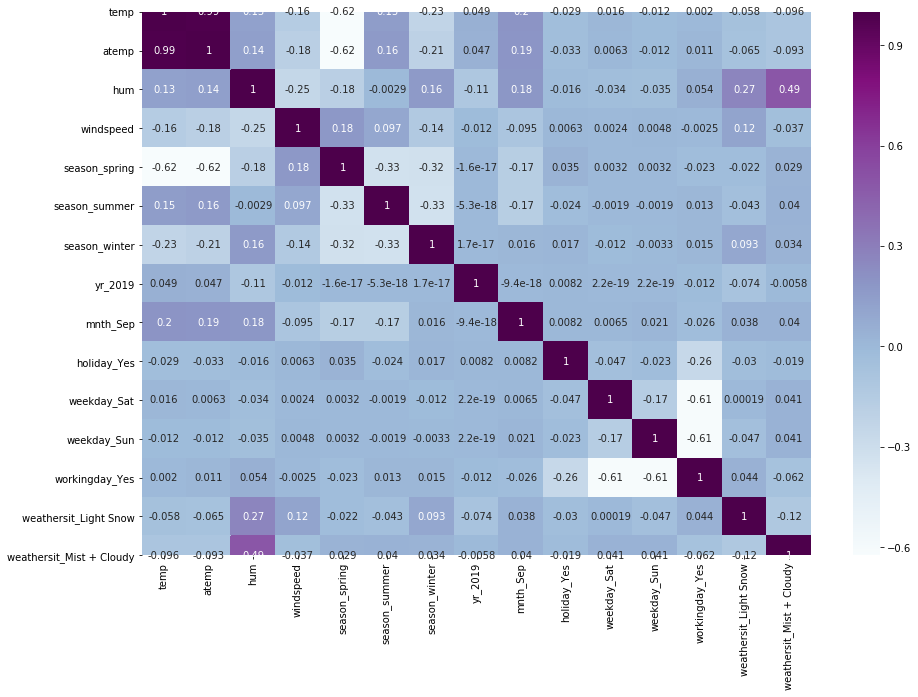

In [46]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.

plt.figure(figsize = (15,10))
sns.heatmap(df_bike[['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Sep', 'holiday_Yes', 'weekday_Sat',
       'weekday_Sun', 'workingday_Yes', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy']].corr(), cmap='BuPu', annot=True)

plt.show()

### Inferences:
    
    Both temp and atemp are correlated to each other.
    

### Model 2 - Post removing atemp column due to high p-value & high VIF

In [47]:
# dropping the variable atemp as it has high P-value as well as high VIF

cols = ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Sep', 'holiday_Yes', 'weekday_Sat',
       'weekday_Sun', 'workingday_Yes', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          6.44e-192
Time:                        23:21:23   Log-Likelihood:                -4113.3
No. Observations:                 511   AIC:                             8257.
Df Residuals:                     496   BIC:                             8320.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Model 3 - After dropping weekday_Sun column

In [48]:
# Dropping weekday_Sun as it has negative Co-efficient and is insignifacnt with high P-value

cols = ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Sep', 'holiday_Yes', 'weekday_Sat',
       'workingday_Yes', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy']

build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          6.86e-193
Time:                        23:21:30   Log-Likelihood:                -4113.8
No. Observations:                 511   AIC:                             8256.
Df Residuals:                     497   BIC:                             8315.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Model 4 - After dropping weekday_Sat column

In [49]:
# Dropping weekday_Sat as it has negative Co-efficient and high P-value

cols = ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Sep', 'holiday_Yes',
       'workingday_Yes', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy']

build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.89e-194
Time:                        23:21:32   Log-Likelihood:                -4114.5
No. Observations:                 511   AIC:                             8255.
Df Residuals:                     498   BIC:                             8310.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Model 5 -  Post dropping hum col due to high VIF

In [50]:
# Dropping hum as it has high VIF

cols = ['temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Sep', 'holiday_Yes',
       'workingday_Yes', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     231.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          6.30e-188
Time:                        23:21:34   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8286.
Df Residuals:                     499   BIC:                             8337.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Model 6 - Removing workingday_yes column

In [51]:
#Removing workingday_yes as it insignificant with high p-value and VIF

cols = ['temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Sep', 'holiday_Yes',
        'weathersit_Light Snow','weathersit_Mist + Cloudy']
       
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     250.2
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.05e-187
Time:                        23:21:36   Log-Likelihood:                -4135.3
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     500   BIC:                             8339.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Model 7 - After dropping holiday_Yes column

In [52]:
#Removing holiday_Yes as it insignificant with high p-value and VIF

cols = ['temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Sep', 
        'weathersit_Light Snow','weathersit_Mist + Cloudy']
       
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     274.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.98e-187
Time:                        23:21:38   Log-Likelihood:                -4138.6
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     501   BIC:                             8340.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

###### Inferences:

We can consider this model as both R square and adjusted R square value is greater than 0.82, the VIF value is below the expected range which is 5 and the P-value for the all the columns are almost zero i.e. below the assumed value 0.05.

Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that should be removed from this model.

In [53]:
#Building a model with all columns to select features automatically

def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [54]:
#Building the final model using sklearn

cols = ['temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Sep', 
        'weathersit_Light Snow','weathersit_Mist + Cloudy']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1607.3105172075743 [ 4217.7656729  -1275.62771315  -551.81863701   502.89913333
   798.83590319  2045.19367127   595.37205691 -2274.13427332
  -658.54674036]


## 8. Model Evaluation

### 8.1 Residucal Analysis

In [55]:
# selecting columns for train predict data

y_train_pred = lr.predict(X_train[cols])

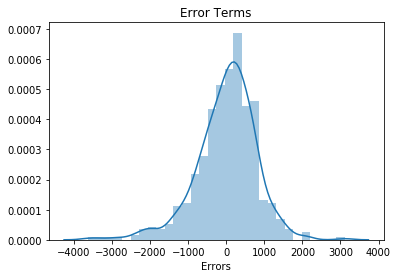

In [56]:
#Plot a histogram of the error terms

def res(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
    

res(y_train, y_train_pred)

Inference:
    
    This should be considered right train model as the mean value is 0
    

In [57]:
#Print R-squared Value

r2_score(y_train,y_train_pred)

0.8312719965201846

Inference:
    
    The R-square value is same as we have got in our last model 0.83

### 8.2 Linearity check

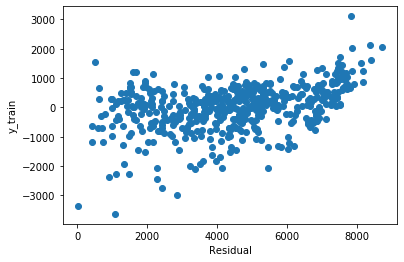

In [58]:
# scatter plot for checking the linearity

residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 8.3 Predict values for test data set

In [59]:
#Scale variables in X_test

col1 = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting

X_test[col1] = scaler.transform(X_test[col1])

In [60]:
#Columns from our final model
col2 = ['temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Sep', 
        'weathersit_Light Snow','weathersit_Mist + Cloudy']

#Predict the values for test data

y_test_pred = lr.predict(X_test[col2])

### 8.4 R-square and adjusted R-square value for test data

In [61]:
# Find out the R squared value for test data  
R2_test= r2_score(y_test,y_test_pred)
print(R2_test)

0.791468749313812


In [64]:
# Finding out the adjusted R-squared value for the test data

n = X_test.shape[0]

p = X_test.shape[1]

adjusted_r2_test = (1 - (1 - R2_test) * ((n - 1)/(n-p-1)))
print(adjusted_r2_test)

0.7594718907429153


In [65]:
# Get the shape of X_test

X_test.shape

(219, 29)

### 8.5 Homoscedacity

Text(0, 0.5, 'y_test_pred')

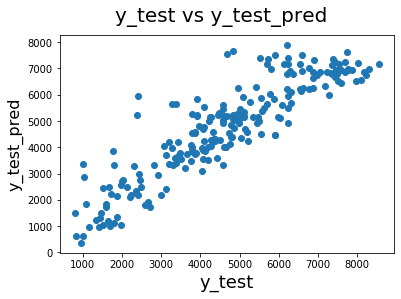

In [66]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)


## 9. Final Result Comparison

    Train R^2 :0.831

    Train Adjusted R^2 :0.828

    Test R^2 :0.791


## 10. Final Conclusion

1. During the spring season, there will be more demand for renting bikes.


2. When there will be heavy rain, snow fall and Thunderstorm, customer will be lesser in number to rent a bike.


3. Month september would be a good time to start a new business strategy


4. Below features are highly impacting the business:

    Temperature
    
    Windspeed
    
    Season
